# Tugas Besar 1B IF3270 - Machine Learning
------------------------------------------
##### NIM/Nama  : 13517014/Yoel Susanto | 13517065/Andrian Cedric | 13517131/Jan Meyer Saragih | 13517137/Vincent Budianto
##### Nama file : Tubes1B_13517014.ipynb
##### Topik     : Implementasi modul ID3 dan C4.5
##### Tanggal   : 14 February 2020
------------------------------------------

In [1]:
from DecisionTree import DecisionTree
from FitC45 import *
from sklearn.tree.export import export_text

import Function as f
import id3 as id
import numpy as np
import pandas as pd
import sklearn.datasets as dataset
import sklearn.preprocessing as preprocessing
import sklearn.tree as tree

# A. Sklearn, ID3Estimator and ID3 + C4.5 Result Comparison

In [2]:
iris = dataset.load_iris()
tennis = pd.read_csv('tennis.csv')
tHead = list(tennis.columns)
tennis = np.array(tennis)
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')
estimator = id.Id3Estimator()
encoder = preprocessing.LabelEncoder()

## A. Dataset iris

### a. DecisionTreeClassifier

[Text(167.4, 199.32, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue 

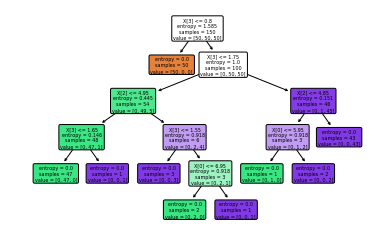

In [4]:
iris_tree1 = decision_tree.fit(iris.data, iris.target)
tree.plot_tree(iris_tree1, filled=True, rounded=True)

In [5]:
ri1 = export_text(iris_tree1, feature_names=iris['feature_names'])
print(ri1)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



### b. Id3Estimator

In [6]:
iris_tree2 = estimator.fit(iris.data, iris.target)

In [7]:
ri2 = id.export_text(iris_tree2.tree_, feature_names=iris['feature_names'])
print(ri2)


petal length (cm) <=2.45: 0 (50) 
petal length (cm) >2.45
|   petal width (cm) <=1.75
|   |   sepal length (cm) <=7.10
|   |   |   sepal width (cm) <=2.85: 1 (27/4) 
|   |   |   sepal width (cm) >2.85: 1 (22) 
|   |   sepal length (cm) >7.10: 2 (1) 
|   petal width (cm) >1.75
|   |   sepal length (cm) <=5.95
|   |   |   sepal width (cm) <=3.10: 2 (6) 
|   |   |   sepal width (cm) >3.10: 1 (1) 
|   |   sepal length (cm) >5.95: 2 (39) 



### C. ID3 + C4.5

In [8]:
dataHead, data, dataRaw = getCSVData("iris.csv")
prune(dataHead, data, dataRaw)

Tree Result:
petal.length <= 2.45 : 40
|  Setosa
petal.length > 2.45 : 44/36
|  petal.width <= 1.75 : 43/3
|  |  sepal.length <= 6.95 : 43/2
|  |  |  sepal.width <= 2.25 : 2/1
|  |  |  |  Versicolor
|  |  |  sepal.width > 2.25 : 41/1
|  |  |  |  Versicolor
|  |  sepal.length > 6.95 : 1
|  |  |  Virginica
|  petal.width > 1.75 : 1/33
|  |  sepal.length <= 5.95 : 1/4
|  |  |  sepal.width <= 3.05 : 4
|  |  |  |  Virginica
|  |  |  sepal.width > 3.05 : 1
|  |  |  |  Versicolor
|  |  sepal.length > 5.95 : 29
|  |  |  Virginica


## C. Dataset tennis

### a. DecisionTreeClassifier

[Text(133.92000000000002, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(100.44000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(66.96000000000001, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(33.480000000000004, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(100.44000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92000000000002, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(234.36, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(200.88000000000002, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(267.84000000000003, 65.232, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(234.36, 21.744, 'entropy = 0

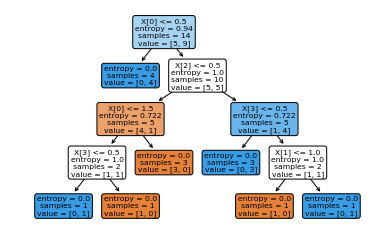

In [9]:
tennis[:, 0] = encoder.fit_transform(tennis[:, 0])
tennis[:, 1] = encoder.fit_transform(tennis[:, 1])
tennis[:, 2] = encoder.fit_transform(tennis[:, 2])
tennis[:, 3] = encoder.fit_transform(tennis[:, 3])
tennis[:, 4] = encoder.fit_transform(tennis[:, 4])

tData = tennis[:, :4]
tTarget = list(tennis[:, 4])

tennis_tree1 = decision_tree.fit(tData, tTarget)
tree.plot_tree(tennis_tree1, filled=True, rounded=True)

In [10]:
rt1 = export_text(tennis_tree1, feature_names=tHead[:4])
print(rt1)

|--- outlook <= 0.50
|   |--- class: 1
|--- outlook >  0.50
|   |--- humidity <= 0.50
|   |   |--- outlook <= 1.50
|   |   |   |--- windy <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- windy >  0.50
|   |   |   |   |--- class: 0
|   |   |--- outlook >  1.50
|   |   |   |--- class: 0
|   |--- humidity >  0.50
|   |   |--- windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- windy >  0.50
|   |   |   |--- temp <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- temp >  1.00
|   |   |   |   |--- class: 1



### b. Id3Estimator

In [11]:
tennis_tree2 = estimator.fit(tData, tTarget)

In [12]:
rt2 = id.export_text(tennis_tree2.tree_, feature_names=tHead[:4])
print(rt2)


outlook <=0.50: 1 (4) 
outlook >0.50
|   humidity <=0.50
|   |   temp <=1.50: 0 (2) 
|   |   temp >1.50
|   |   |   windy <=0.50: 0 (1/1) 
|   |   |   windy >0.50: 0 (1) 
|   humidity >0.50
|   |   windy <=0.50: 1 (3) 
|   |   windy >0.50
|   |   |   temp <=1.00: 0 (1) 
|   |   |   temp >1.00: 1 (1) 



### C. ID3 + C4.5

In [13]:
dataHead, data, dataRaw = getCSVData("tennis.csv")
prune(dataHead, data, dataRaw)

Tree Result:
humidity == high
|  outlook == sunny
|  |  no
|  outlook == overcast
|  |  yes
|  outlook == rainy
|  |  no
humidity == normal
|  outlook == sunny
|  |  yes
|  outlook == overcast
|  |  yes
|  outlook == rainy
|  |  windy == False
|  |  |  yes
|  |  windy == True
|  |  |  no


# B. Explanation of Implementation ID3 + C4.5

## Pseudo-code
### Part 1: Preparing the data
<ol>
    <li> Read the CSV data </li>
    <li> Splits the dataHead (metadata) and the rest of the data </li>
    <li> Splits the data into x and y </li>
        <ul>
            <li> X is the data that has all the attributes in it </li>
            <li> Y is the data that has all the results (the verdict) </li>
        </ul>
    <li> Encodes all the data in x and y and saves it into the dictionary </li>
        <ul>
            <li> If the attribute is discrete, the dictionary stores all possible values of that attribute </li>
            <li> If the attribute is continuous, the dictionary stores the breakpoints of the attribute. Breakpoint is created  when there is the change in attribute’s value which creates a change in target’s value </li>
        </ul>
</ol>

### Part 2: Decision tree building
<ol>
    <li> Initiates the all possible attributes to be checked </li>
    <li> Receives encoded data of X and Y as well as the dictionaries </li>
    <li> Do until it the data is uniform or until there is no more attributes that can be checked (recursive): </li>
        <ul>
            <li> Initiates information gain, splitted attributes container, and splitted target container. </li>
            <li> Loop through all available attributes in the possible attributes: </li>
                <ul>
                    <li> Loop through all possible values that has been stored in the dictionary </li>
                        <ol>
                            <li> Get the entropy of each loop </li>
                            <li> Store temporary splitted attributes temporary container and splitted target temporary container </li>
                        </ol>
                    <li> Calculate the information gain </li>
                    <li> If the information gain > initiated information gain (usually 0) </li>
                        <ol>
                            <li> Then move the all temporary containers (splitted data temporary container and splitted target container) into the actual container </li>
                            <li> Set the value of maximum information gain (value that must be surpassed if another attribute will be chosen as the root) </li>
                        </ol>
            <li> Maximum information gain is chosen. Set the node value into the name of the attribute </li>
            <li> Remove the attribute orm the possible attributes for the next recursive call. </li>
            <li> For all possible roots (the amount of data splitted): </li>
                <ol>
                    <li> Recursively call function number III again. </li>
                </ol>
        </ul>
</ol>

## C4.5 Improvements
<ol>
    <li> Handling continuous attributes
        <ul>
            <li> C4.5 creates a threshold of values to classify the values. Created as follows: </li>
                <ul>
                    <li> Loop through the data and target. </li>
                    <li> If the target on the current index and the target on the previous index is different as well as if the checked attribute of the current data index is different than the previous index, then create breakpoint </li>
                    <li> Breakpoint = (previous value + current value) / 2 </li>
                    <li> All the data from the (previous breakpoint  + 1) (or first element if breakpoint hasn’t been made yet) is clustered into one group. </li>
                </ul>
            <li> When looping for the possible best information gain, do as follows: </li>
                <ul>
                    <li> For every breakpoint </li>
                        <ol>
                            <li> Classify the data into 2 groups (one is less or equal than the breakpoint, the other one is bigger than the breakpoint) </li>
                            <li> Calculate the entropy and information gain </li>
                            <li> If the breakpoint’s information gain, then set the best </li>
                        </ol>
                    <li> Get the maximum information gain, which is the maximum information gain from every possible breakpoints in the attribute </li>
                    <li> Get the maximum information gain from all attributes </li>
                </ul>
        </ul>
    </li>
    <li> Handling missing attribute value 
        <ul>
            <li> C4.5 allows missing attribute values to be marked as most common target value. </li>
        </ul>
    </li>
    <li> Handling attributes with many value </li>
        <ul>
            <li> Creates a decision tree that has more than two child nodes </li>
            <li> Used only for discrete values, as the continuous values always be split into two childs </li>
        </ul>
    <li> Post-pruning
        <ul>
            <li> Split the data into 80% and 20% (80% becomes training data and 20% becomes testing data) </li>
            <li> Build a decision tree </li>
            <li> Converts data to set of rules </li>
            <li> Calculate initial accuracy with testing data </li>
            <li> Test the pruning set of rules </li>
                <ul>
                    <li> One of the rules was changed by reducing the number of conditions (IF) </li>
                    <li> If the rule (pre-run) does not reduce accuracy, then do the pruning </li>
                    <li> If not, try another rule </li>
                    <li> If all rules have been tried and accuracy is reduced, then stop pruning </li>
                </ul>
        </ul>
    </li>
</ol>

# C. Pembagian Tugas

| NIM      | Nama              | Tugas                                                                  |
|:--------:|:------------------|:-----------------------------------------------------------------------|
| 13517014 | Yoel Susanto      | ID3, Missing attribute value, Attributes with many value, Post-pruning |
| 13517065 | Andrian Cedric    | ID3, Missing attribute value, Post-pruning, Documentation              |
| 13517131 | Jan Meyer Saragih | ID3, Continous attributes, Attributes with many value, Post-pruning    |
| 13517137 | Vincent Budianto  | ID3, Continous attributes, Post-pruning, Documentation                 |